## Telecom Customer Churn Data Analysis Summary

**Assumption 1:** 'Account Length' means how long the customer held on to his account before churn  

**Insight 1:**  
customer holding account is normally distributed with peak at 100

**Insight 2:**  
Voice Mail Message senders account for 26.77% of the customer

**Insight 3:**  
Number of voice messages sent is normally distributed peaking at 30 messages

**Important 1:**  
Average Customer Services calls made by Churned out customer is above 2 calls, where as other customers have made less than 1.5 calls on average

**Note :**
Calls are divided into Day Calls, Evening Calls, Night Calls and International Calls.   
We have data of duration(in minuites) of each type of calls and the corresponding charges.   

**Insight 4:**  
The distribution of duration(in minuites) of calls for each type of calls is almost normal and matches with distribution of charges(as it should be).  
The distribution of Number of calls is also normally distributed except for 'International calls', where it is negatively skewed.  

**Important 2:**  
Churn has week correlation with many features. 
Top 5 features that have strong correlations are
1. International Plan
2. Customer Service Calls
3. Day Call Charges
4. Voice mail plan
5. Number of voice mail messages sent

**Insight 5:**  
Among customer that have churned out, nearly 4 out of 5 had 'International Plan'.  
Among existing customers, nearly 2 out of 5 had 'International Plan'

**Insight 6:**  
Customer not having Voice Mail Plan tend to churn out at double the rate.

**Insight 6.1:**  
Among customers who have opted for Voice Mail Plan,  Churned out people,  
have sent more Voice Mail messages(avg 31.21 messages) than others(others have sent avg 29.16 messages)

**Insight 7:**  
Customers making longer 'day' calls tend to churn out.

**Insight 8:**  
The churning customers percentage in each of the 3 Areas seems to be almost same(around 14% to 15%)

**Insight 9:**  
Customers that have opted for Voice Mail Plan seems to be happy.   
Churn of VMail plan opted customer seems to be half of Non-VMail opted customer  

**Insight 10:**   
Around 29% of the CA customer churned out.  
Next hightest is around 23% of WA customer churned out.  
State with least churn is VA, with around 5% churn out.

**Insight 11:**  
About 27% of the customer have opted for Voice Mail Plan

**Insight 12:**  
Only 'Day Calls' and its charges has any significant influence on Churn,   
Evening Calls(and its charges), Night Calls(and its charges) doesn't seem to have significant impact on Churn.



In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_excel('TelecomChurnColumnsRenamed.xls', index_col='Unnamed: 0')

In [3]:
df.shape

(4617, 21)

In [4]:
df.isnull().sum()

State                   0
Account Length          0
Area Code               0
Phone                   0
International Plan      0
VMail Plan              0
VMail Message           0
Day Mins                0
Day Calls               0
Day Charge              0
Eve Mins                0
Eve Calls               0
Eve Charge              0
Night Mins              0
Night Calls             0
Night Charge            0
International Mins      0
International Calls     0
International Charge    0
CustServ Calls          0
Churn                   0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4617 entries, 0 to 4616
Data columns (total 21 columns):
State                   4617 non-null object
Account Length          4617 non-null int64
Area Code               4617 non-null int64
Phone                   4617 non-null object
International Plan      4617 non-null object
VMail Plan              4617 non-null object
VMail Message           4617 non-null int64
Day Mins                4617 non-null float64
Day Calls               4617 non-null int64
Day Charge              4617 non-null float64
Eve Mins                4617 non-null float64
Eve Calls               4617 non-null int64
Eve Charge              4617 non-null float64
Night Mins              4617 non-null float64
Night Calls             4617 non-null int64
Night Charge            4617 non-null float64
International Mins      4617 non-null float64
International Calls     4617 non-null int64
International Charge    4617 non-null float64
CustServ Calls          4617 non-null

In [6]:
cat_columns = df.select_dtypes(include=['object']).columns.tolist()

for col in cat_columns:
    df[col] = df[col].str.strip()
    df[col] = df[col].astype('category') 

#Changin 'Area Code' column as 'category' type
df['Area Code'] = df['Area Code'].astype('category') 

#Updated cat_columns
cat_columns = df.select_dtypes(include=['category']).columns.tolist()

In [7]:
cat_columns

['State', 'Area Code', 'Phone', 'International Plan', 'VMail Plan', 'Churn']

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

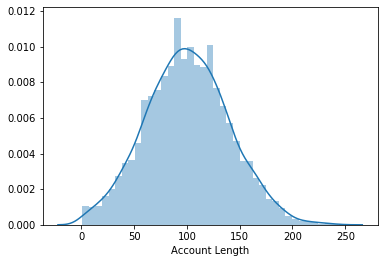

In [9]:
sns.distplot(df['Account Length'].astype(int));

**Assumption 1:** 'Account Length' means how long the customer held on to his account before churn  

**Insight 1:**  
customer holding account is normally distributed with peak at 100(days?)

In [10]:
df['Churn'].value_counts()

False.    3961
True.      656
Name: Churn, dtype: int64

In [11]:
df['Churn'] = df.Churn.apply(lambda x: 'Yes' if x == 'True.' else 'No')

In [12]:
df['Churn'].value_counts()

No     3961
Yes     656
Name: Churn, dtype: int64

#### How is the 'account length' distribution for Churned out people and for non-churned people?

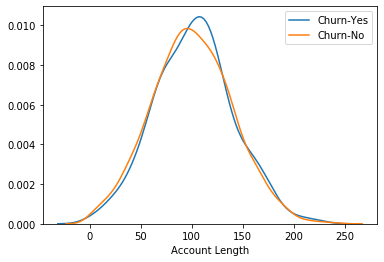

In [13]:
ax = sns.distplot(df[df['Churn'] == 'Yes']['Account Length'],hist=False, label='Churn-Yes');
ax = sns.distplot(df[df['Churn'] == 'No']['Account Length'], hist=False, label='Churn-No');

ax.legend();

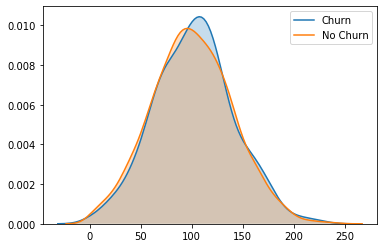

In [14]:
sns.kdeplot(data=df[df.Churn == 'Yes']['Account Length'], shade=True, label='Churn')
g = sns.kdeplot(data=df[df.Churn == 'No']['Account Length'], shade=True, label='No Churn')
g.legend();

In [15]:
df.describe()

,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls
count,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000
mean,100.645224,7.849903,180.447152,100.054364,30.676576,200.429088,100.179770,17.036703,200.623933,99.944120,9.028185,10.279294,4.433831,2.775926,1.567035
std,39.597194,13.592333,53.983540,19.883027,9.177145,50.557001,19.821314,4.297332,50.543616,19.935053,2.274488,2.757361,2.457615,0.744413,1.307019
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,12.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,165.900000,87.000000,14.100000,167.100000,87.000000,7.520000,8.600000,3.000000,2.320000,1.000000
50%,100.000000,0.000000,180.000000,100.000000,30.600000,200.800000,101.000000,17.070000,200.800000,100.000000,9.040000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,17.000000,216.800000,113.000000,36.860000,234.000000,114.000000,19.890000,234.900000,113.000000,10.570000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [16]:
vmail_users = df[df['VMail Message'] != 0].shape[0]
    

total = df.shape[0]
print('Voice Mail Message Senders are : ', round(vmail_users/total,4)*100, '%')

Voice Mail Message Senders are :  26.77 %


**Insight 2:**  
Voice Mail Message senders account for 26.77% of the customer

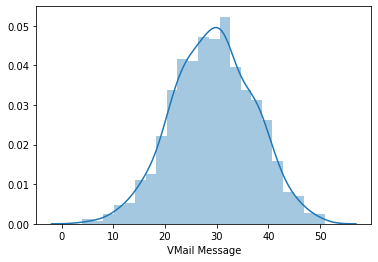

In [17]:
sns.distplot(df[df['VMail Message'] != 0]['VMail Message']);

**Insight 3:**  
Number of voice messages sent is normally distributed peaking at 30 messages

In [18]:
df_churn = df[df.Churn == 'Yes']
df_nochurn = df[df.Churn == 'No']



In [19]:

ser_churn = df_churn.groupby('CustServ Calls').count()['Phone']
ser_nochurn = df_nochurn.groupby('CustServ Calls').count()['Phone']


In [20]:
df_churn = pd.DataFrame(ser_churn)
df_nochurn = pd.DataFrame(ser_nochurn)

In [21]:
df_churn['count_percent']   = df_churn.Phone.apply(  lambda x: round((x*100)/  ser_churn.sum()))
df_nochurn['count_percent'] = df_nochurn.Phone.apply(lambda x: round((x*100)/ser_nochurn.sum()))

In [22]:
df_nochurn

,Phone,count_percent
CustServ Calls,,
0,835,21.0
1,1475,37.0
2,919,23.0
3,551,14.0
4,130,3.0
5,34,1.0
6,10,0.0
7,6,0.0
8,1,0.0


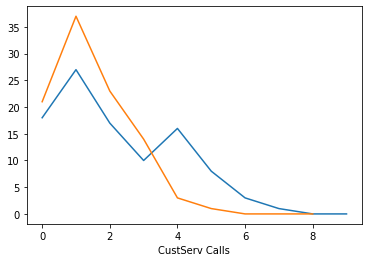

In [23]:
sns.lineplot(df_churn['count_percent'].index, df_churn['count_percent'].values);
sns.lineplot(df_nochurn['count_percent'].index, df_nochurn['count_percent'].values);

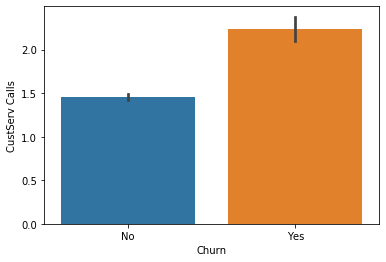

In [24]:
sns.barplot('Churn', 'CustServ Calls', data=df);

**Important 1:**  
Average Customer Services calls made by Churned out customer is above 2 calls, where as other customers have made less than 1.5 calls on average

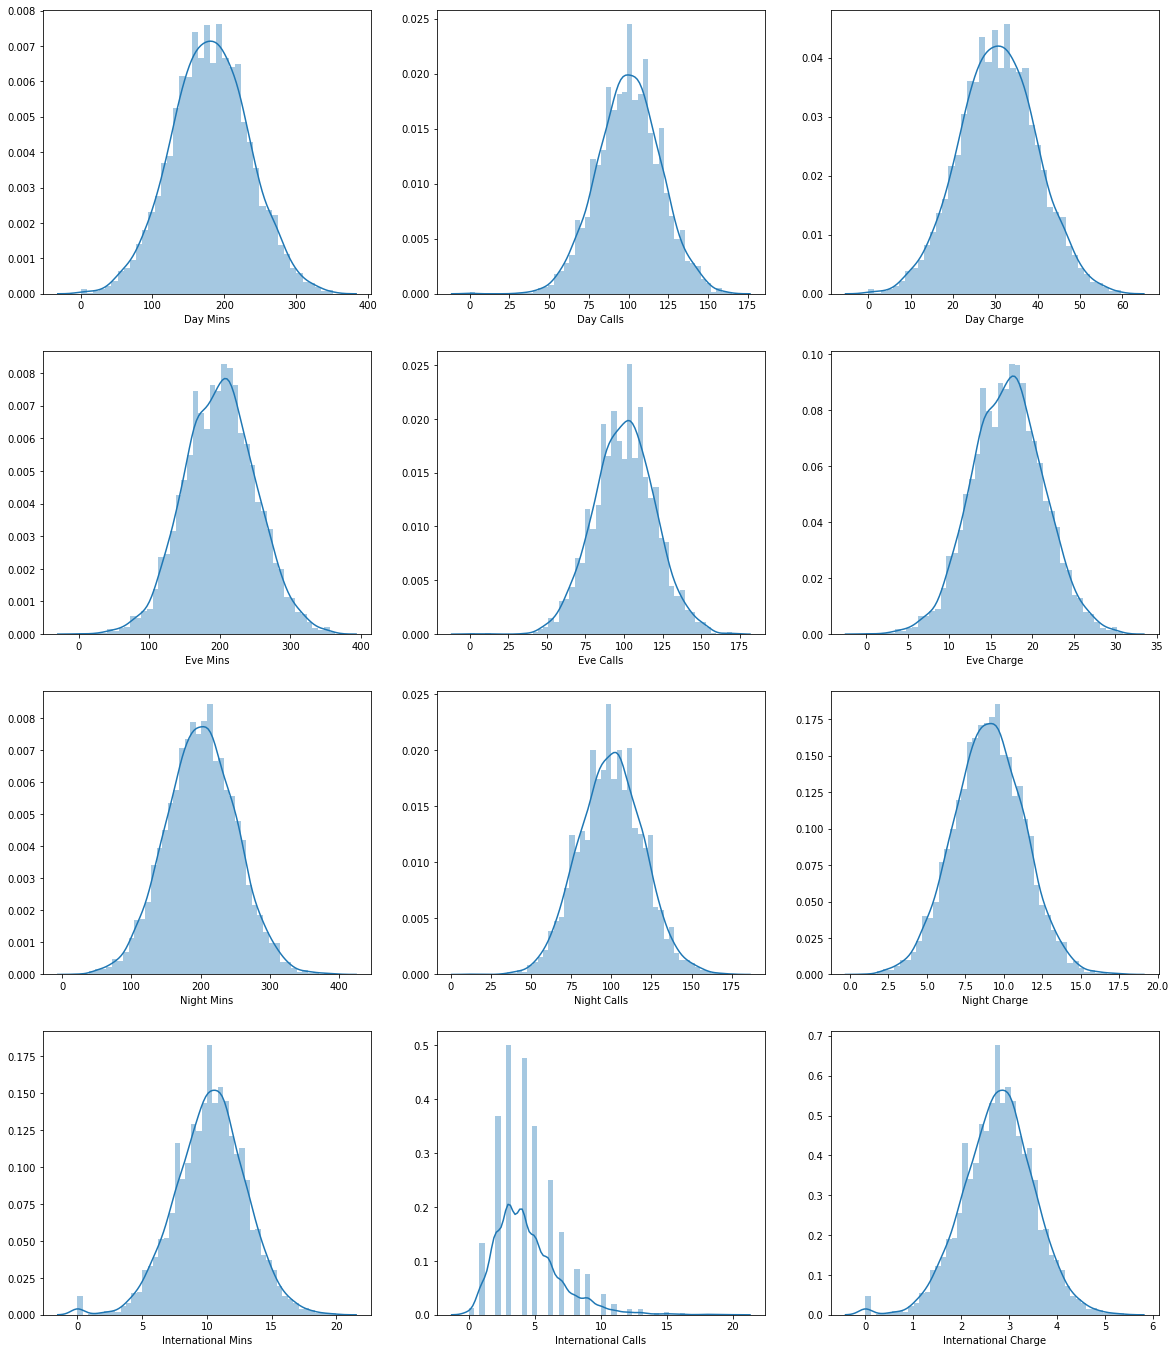

In [25]:
f, axes = plt.subplots(4, 3, figsize=(20, 24))

sns.distplot(df['Day Mins'],   ax=axes[0,0]);
sns.distplot(df['Day Calls'],  ax=axes[0,1]);
sns.distplot(df['Day Charge'], ax=axes[0,2]);

sns.distplot(df['Eve Mins'],   ax=axes[1,0]);
sns.distplot(df['Eve Calls'],  ax=axes[1,1]);
sns.distplot(df['Eve Charge'], ax=axes[1,2]);

sns.distplot(df['Night Mins'],   ax=axes[2,0]);
sns.distplot(df['Night Calls'],  ax=axes[2,1]);
sns.distplot(df['Night Charge'], ax=axes[2,2]);

sns.distplot(df['International Mins'],   ax=axes[3,0]);
sns.distplot(df['International Calls'],  ax=axes[3,1]);
sns.distplot(df['International Charge'], ax=axes[3,2]);



**Note :**
Calls are divided into Day Calls, Evening Calls, Night Calls and International Calls.   
We have data of duration(in minuites) of each type of calls and the corresponding charges.   
**Insight 4:**  
The distribution of duration(in minuites) of calls for each type of calls is almost normal and matches with distribution of changes(as it should be).  
The distribution of Number of calls is also normally distributed except for 'International calls', where it is negatively skewed.  

## Correlation of various feature with Churn flag

In [26]:
data = df.copy()

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4617 entries, 0 to 4616
Data columns (total 21 columns):
State                   4617 non-null category
Account Length          4617 non-null int64
Area Code               4617 non-null category
Phone                   4617 non-null category
International Plan      4617 non-null category
VMail Plan              4617 non-null category
VMail Message           4617 non-null int64
Day Mins                4617 non-null float64
Day Calls               4617 non-null int64
Day Charge              4617 non-null float64
Eve Mins                4617 non-null float64
Eve Calls               4617 non-null int64
Eve Charge              4617 non-null float64
Night Mins              4617 non-null float64
Night Calls             4617 non-null int64
Night Charge            4617 non-null float64
International Mins      4617 non-null float64
International Calls     4617 non-null int64
International Charge    4617 non-null float64
CustServ Calls          46

In [28]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
for labelColumn in cat_columns:
    data[labelColumn] = enc.fit_transform(data[labelColumn])

In [29]:
data.head(2)

,State,Account Length,Area Code,Phone,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls,Churn
0,16,128,1,2637,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0
1,35,107,1,2132,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,0


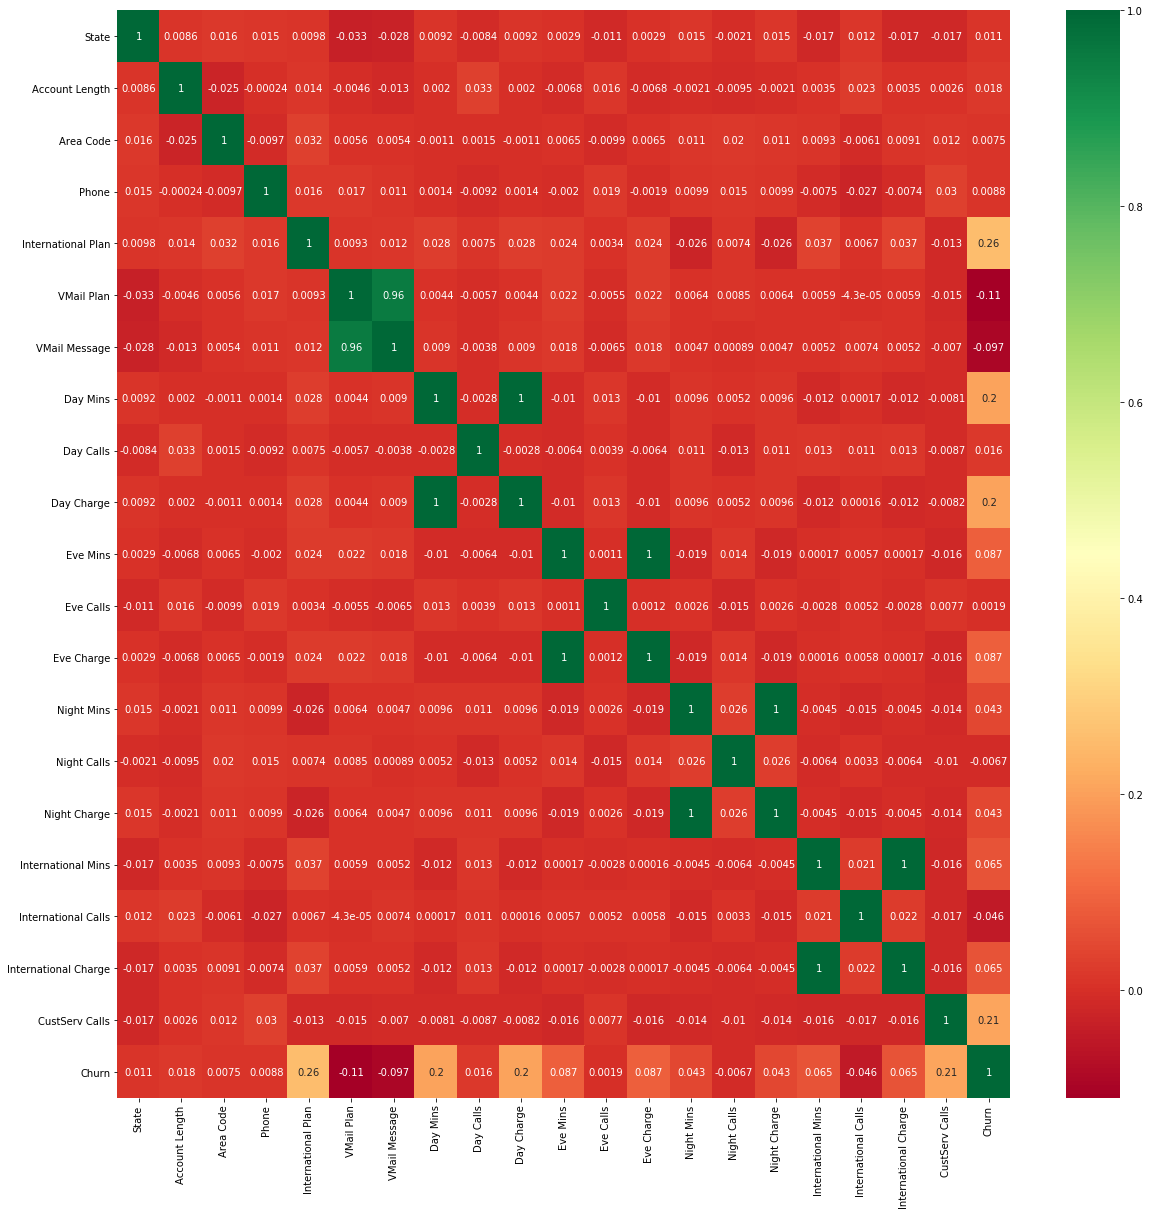

In [30]:
corrdf = data.corr()
top_corr_features = corrdf.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [31]:
absCorrWithChurn = corrdf.Churn.apply(lambda x: abs(x))

absCorrWithChurn.sort_values(ascending=False)

Churn                   1.000000
International Plan      0.257524
CustServ Calls          0.209351
Day Mins                0.202439
Day Charge              0.202434
VMail Plan              0.110149
VMail Message           0.096884
Eve Mins                0.087042
Eve Charge              0.087036
International Mins      0.064731
International Charge    0.064728
International Calls     0.045844
Night Mins              0.043262
Night Charge            0.043260
Account Length          0.018046
Day Calls               0.016268
State                   0.010979
Phone                   0.008819
Area Code               0.007502
Night Calls             0.006671
Eve Calls               0.001943
Name: Churn, dtype: float64

**Important 2:**  
Churn has week correlation with many features. Top 5 features among them  
1. International Plan
2. Customer Service Calls
3. Day Call Charges
4. Voice mail plan
5. Number of voice mail messages sent

### Churn based on International Plan

In [32]:
df['International Plan'].value_counts()

no     4171
yes     446
Name: International Plan, dtype: int64

In [33]:
df['Churn'].value_counts()

No     3961
Yes     656
Name: Churn, dtype: int64

In [34]:
#Percentage of people who have opted for international plan that have churned out
df[df['International Plan'] == 'yes'].shape[0]

446

In [35]:
df[(df['International Plan'] == 'yes') &  (df['Churn'] == 'Yes')].shape[0]
   
#df['International Plan'] == 'yes'
#df['Churn'] == 'Yes'


186

In [36]:
intPlanChurnDf = df.loc[:,['Churn','International Plan']].copy()

In [37]:
churnDf = pd.get_dummies(intPlanChurnDf['Churn'])
intPlan = pd.DataFrame(intPlanChurnDf['International Plan'])

In [38]:
churnDf.head(2)

,No,Yes
0,1,0
1,1,0


In [39]:
intPlan.head(2)

,International Plan
0,no
1,no


In [40]:
churnVsIntPlan = pd.concat([intPlan, churnDf], axis=1)
                 #pd.concat([df1, df4], axis=1)

In [41]:
churnVsIntPlan.head()

,International Plan,No,Yes
0,no,1,0
1,no,1,0
2,no,1,0
3,yes,1,0
4,yes,1,0


In [42]:
df.Churn.value_counts().index.to_list()

['No', 'Yes']

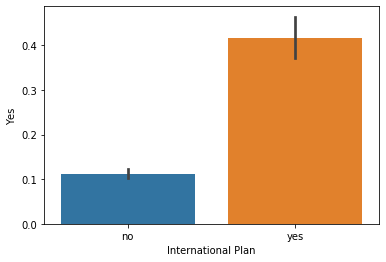

In [43]:
sns.barplot('International Plan', 'Yes', data=churnVsIntPlan);

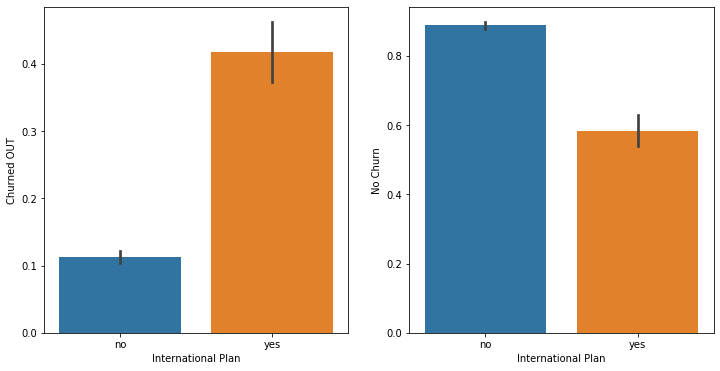

In [44]:
f, a = plt.subplots(1,2,figsize=(12, 6))


sns.barplot('International Plan', 'Yes', data=churnVsIntPlan, ax=a[0])
sns.barplot('International Plan', 'No',  data=churnVsIntPlan, ax=a[1]);
a[0].set_ylabel('Churned OUT');
a[1].set_ylabel('No Churn');

**Insight 5:**  
Among customer that have churned out, nearly 4 out of 5 had 'International Plan'.  
Among existing customers, nearly 2 out of 5 had 'International Plan'

In [45]:
churnVsIntPlan[churnVsIntPlan['International Plan'] == 'yes'].Yes.value_counts()

0    260
1    186
Name: Yes, dtype: int64

In [46]:
churnVsIntPlan.No.describe()

count    4617.000000
mean        0.857916
std         0.349174
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: No, dtype: float64

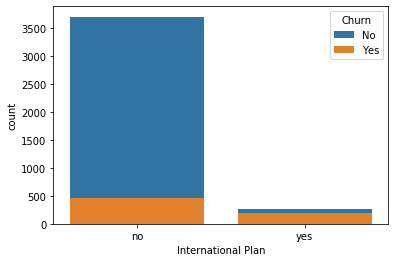

In [47]:
sns.countplot('International Plan', hue='Churn', dodge=False, data=df);

In [48]:
df.shape

(4617, 21)

In [49]:
pd.crosstab(df['International Plan'], df['Churn'])

Churn,No,Yes
International Plan,,
no,3701,470
yes,260,186


470/(470 + 3701)  # % of people NOT having 'International Plan' Churned out

186/(186 + 260)  # % of people HAVING 'International Plan' Churned out

### Churn Based on Voice Mail Plan

In [50]:
df.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'International Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'International Mins', 'International Calls',
       'International Charge', 'CustServ Calls', 'Churn'],
      dtype='object')

In [51]:
VMailPlanVsChurn = df[['VMail Plan', 'Churn']]


In [52]:
#VMailPlanVsChurn['ChurnValue'] = VMailPlanVsChurn.Churn.apply(lambda x: 1 if x == 'Yes' else 0)

In [53]:
VMailPlanVsChurn.head(2)

,VMail Plan,Churn
0,yes,No
1,yes,No


In [54]:
VMailPlanVsChurnYesNum = pd.get_dummies(data = VMailPlanVsChurn, columns = ['Churn'], drop_first=True)

In [55]:
VMailPlanVsChurnYesNum.head(2)

,VMail Plan,Churn_Yes
0,yes,0
1,yes,0


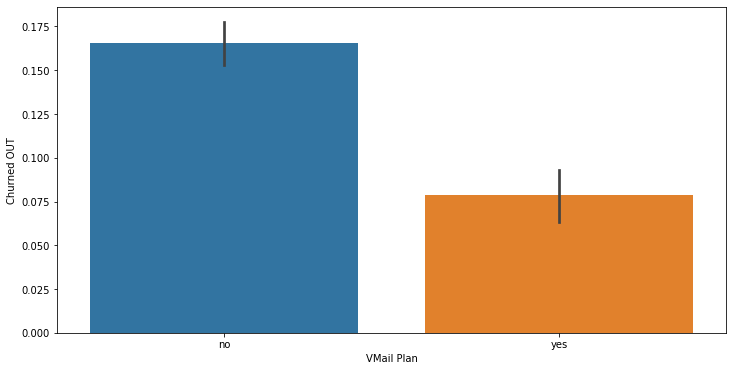

In [56]:
f, a = plt.subplots(1,1,figsize=(12, 6))


sns.barplot('VMail Plan', 'Churn_Yes', data=VMailPlanVsChurnYesNum, ax=a)

a.set_ylabel('Churned OUT');


**INsight 6:**  
Customer not having Voice Mail Plan tend to churn out at double the rate.

### Churn based on Voice Mail messages Sent

In [57]:
df.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'International Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'International Mins', 'International Calls',
       'International Charge', 'CustServ Calls', 'Churn'],
      dtype='object')

In [58]:
dfVMailOpted = df[df['VMail Plan'] == 'yes'][['VMail Message', 'Churn']]

In [59]:
dfVMailOpted.head(2)

,VMail Message,Churn
0,25,No
1,26,No


In [61]:
def dispAvgLabelOnBarTop(ax):
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + ((p.get_width() - 0.5) / 2.), p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

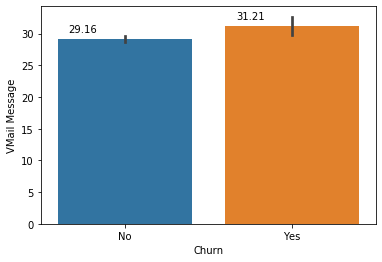

In [62]:
ax=sns.barplot('Churn', 'VMail Message', data=dfVMailOpted)
dispAvgLabelOnBarTop(ax)

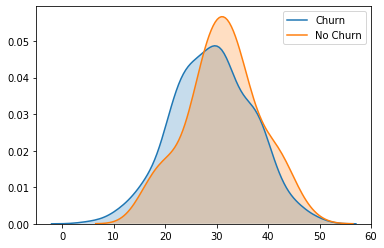

In [63]:
g = sns.kdeplot(data=dfVMailOpted[dfVMailOpted.Churn == 'No' ]['VMail Message'], shade=True, label='Churn')
g = sns.kdeplot(data=dfVMailOpted[dfVMailOpted.Churn == 'Yes']['VMail Message'], shade=True, label='No Churn')
g.legend();

**Insight 6.1:**  
Among customers who have opted for Voice Mail Plan,  Churned out people,  
have sent more Voice Mail messages(avg 31.21 messages) than others(others have sent avg 29.16 messages)

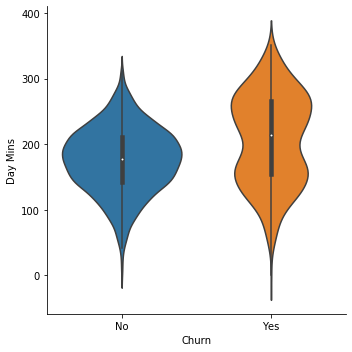

In [64]:


sns.catplot(data=df, x='Churn', y='Day Mins', kind='violin')



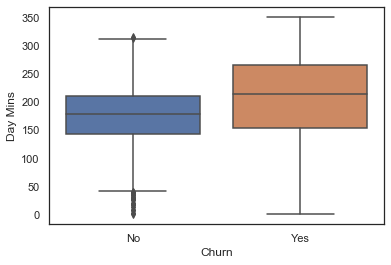

In [65]:
sns.set(style='white', color_codes=True)
sns.boxplot(data=df, x='Churn', y='Day Mins');

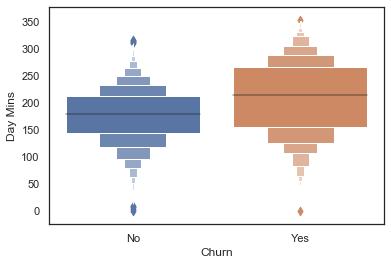

In [66]:
sns.set(style='white', color_codes=True)
sns.boxenplot(data=df, x='Churn', y='Day Mins');

**Insight 7:**  
Customers making longer 'day' calls tend to churn out.

In [67]:
cat_columns

['State', 'Area Code', 'Phone', 'International Plan', 'VMail Plan', 'Churn']

In [68]:
catDf = pd.DataFrame(df[cat_columns])

In [69]:
catDf.head(2)

,State,Area Code,Phone,International Plan,VMail Plan,Churn
0,KS,415,382-4657,no,yes,No
1,OH,415,371-7191,no,yes,No


In [70]:
df.Churn.value_counts()

No     3961
Yes     656
Name: Churn, dtype: int64

In [71]:
catDf['Churn'] = catDf.Churn.apply(lambda x: 1 if x == 'Yes' else 0)

In [72]:
catDf.Churn = catDf.Churn.astype(int)

In [73]:
catDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4617 entries, 0 to 4616
Data columns (total 6 columns):
State                 4617 non-null category
Area Code             4617 non-null category
Phone                 4617 non-null category
International Plan    4617 non-null category
VMail Plan            4617 non-null category
Churn                 4617 non-null int32
dtypes: category(5), int32(1)
memory usage: 440.4 KB


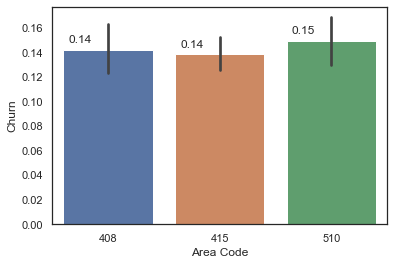

In [74]:
ax = sns.barplot(x="Area Code", y="Churn", 
            #ax=ax, 
            #order=dispOrderList,
            data=catDf);

dispAvgLabelOnBarTop(ax)

**Insight 8:**  
The churning customers percentage in each of the 3 Areas seems to be almost same(around 14% to 15%)

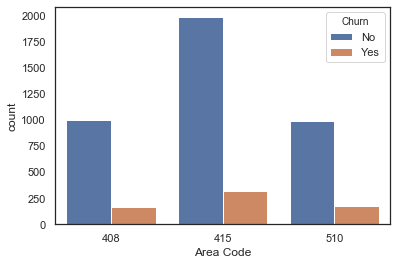

In [75]:
sns.countplot('Area Code', hue='Churn', 
              #dodge=False, 
              data=df);

In [76]:
catDf.head(2)

,State,Area Code,Phone,International Plan,VMail Plan,Churn
0,KS,415,382-4657,no,yes,0
1,OH,415,371-7191,no,yes,0


In [77]:
catDf.columns

Index(['State', 'Area Code', 'Phone', 'International Plan', 'VMail Plan',
       'Churn'],
      dtype='object')

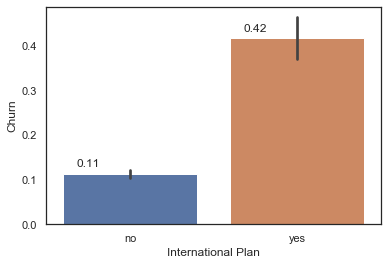

In [78]:
ax = sns.barplot(x="International Plan", y="Churn", 
            #ax=ax, 
            #order=dispOrderList,
            data=catDf);

dispAvgLabelOnBarTop(ax)

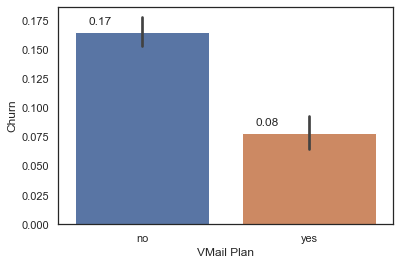

In [79]:
ax = sns.barplot(x="VMail Plan", y="Churn", 
            #ax=ax, 
            #order=dispOrderList,
            data=catDf);

dispAvgLabelOnBarTop(ax)

**Insight 9:**  
Customers that have opted for Voice Mail Plan seems to be happy.   
Churn of VMail plan opted customer seems to be half of Non-VMail opted customer  

In [80]:
#catDf.groupby('State').mean().Churn.sort_values(ascending=False).index.tolist()  #Churn.mean()   #.value_counts()  #.index

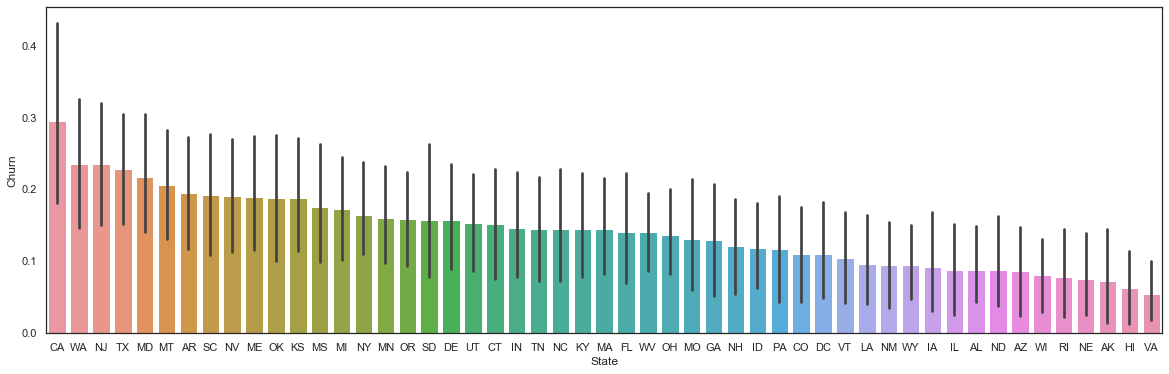

In [81]:
f, a = plt.subplots(1,1,figsize=(20, 6))

stateOrder = catDf.groupby('State').mean().Churn.sort_values(ascending=False).index.tolist() 

sns.barplot(x="State", y="Churn", 
            ax=a, 
            order=stateOrder,
            data=catDf,
            );

#dispAvgLabelOnBarTop(a)

**Insight 10:**   
Around 29% of the CA customer churned out.  
Next hightest is around 23% of WA customer churned out.  
State with least churn is VA, with around 5% churn out.

In [82]:
catDf['VMail Plan'].value_counts()

no     3381
yes    1236
Name: VMail Plan, dtype: int64

In [83]:
1236 / (1236 + 3381)

0.2677063027940221

**Insight 11:**  
About 27% of the customer have opted for Voice Mail Plan

In [84]:
#vmailDf = pd.DataFrame(catDf[catDf['VMail Plan'] == 'yes'].Churn)

In [85]:
df.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'International Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'International Mins', 'International Calls',
       'International Charge', 'CustServ Calls', 'Churn'],
      dtype='object')

In [86]:
df[['Day Mins', 'VMail Message', 'VMail Plan']].head(2)

,Day Mins,VMail Message,VMail Plan
0,265.1,25,yes
1,161.6,26,yes


In [87]:
vmailDf = pd.concat([df[['Day Mins', 'VMail Message', 'VMail Plan']], catDf['Churn']], axis=1)

In [88]:
vmailDf.head(2)

,Day Mins,VMail Message,VMail Plan,Churn
0,265.1,25,yes,0
1,161.6,26,yes,0


In [89]:
tempdf = vmailDf[vmailDf['VMail Plan']=='yes']

In [90]:
tempdf.head(2)

,Day Mins,VMail Message,VMail Plan,Churn
0,265.1,25,yes,0
1,161.6,26,yes,0


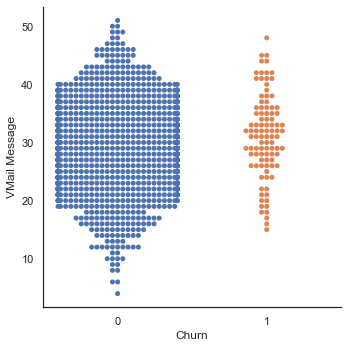

In [91]:
sns.catplot(x="Churn", y="VMail Message", kind="swarm", data=tempdf);

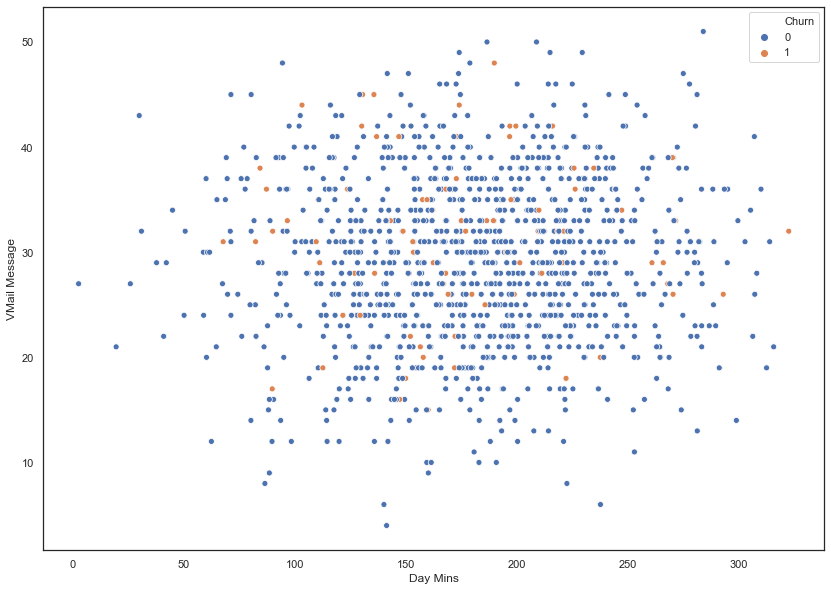

In [92]:
f, axes = plt.subplots(1, 1, figsize=(14, 10))
sns.scatterplot(x='Day Mins', y='VMail Message', hue='Churn', data=tempdf, ax=axes);

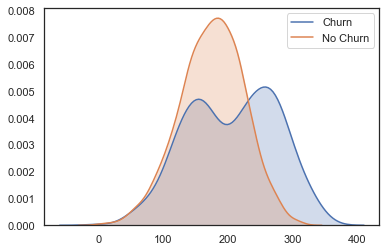

In [93]:
#df[df.Churn == 'Yes']
sns.kdeplot(data=df[df.Churn == 'Yes']['Day Mins'], shade=True, label='Churn')
g = sns.kdeplot(data=df[df.Churn == 'No']['Day Mins'], shade=True, label='No Churn')
g.legend();

Text(0.5, 0, 'Day Mins')

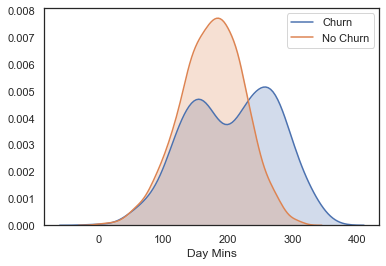

In [94]:
churnDf = df[df.Churn == 'Yes']
noChurnDf = df[df.Churn == 'No']

f, axes = plt.subplots(1, 1, figsize=(6, 4))

#sns.distplot(df['Day Mins'],   ax=axes[0,0]);
sns.kdeplot(data=churnDf['Day Mins'],    shade=True, label='Churn',  ax=axes)
sns.kdeplot(data=noChurnDf['Day Mins'], shade=True, label='No Churn',ax=axes)
axes.legend();
axes.set_xlabel('Day Mins')

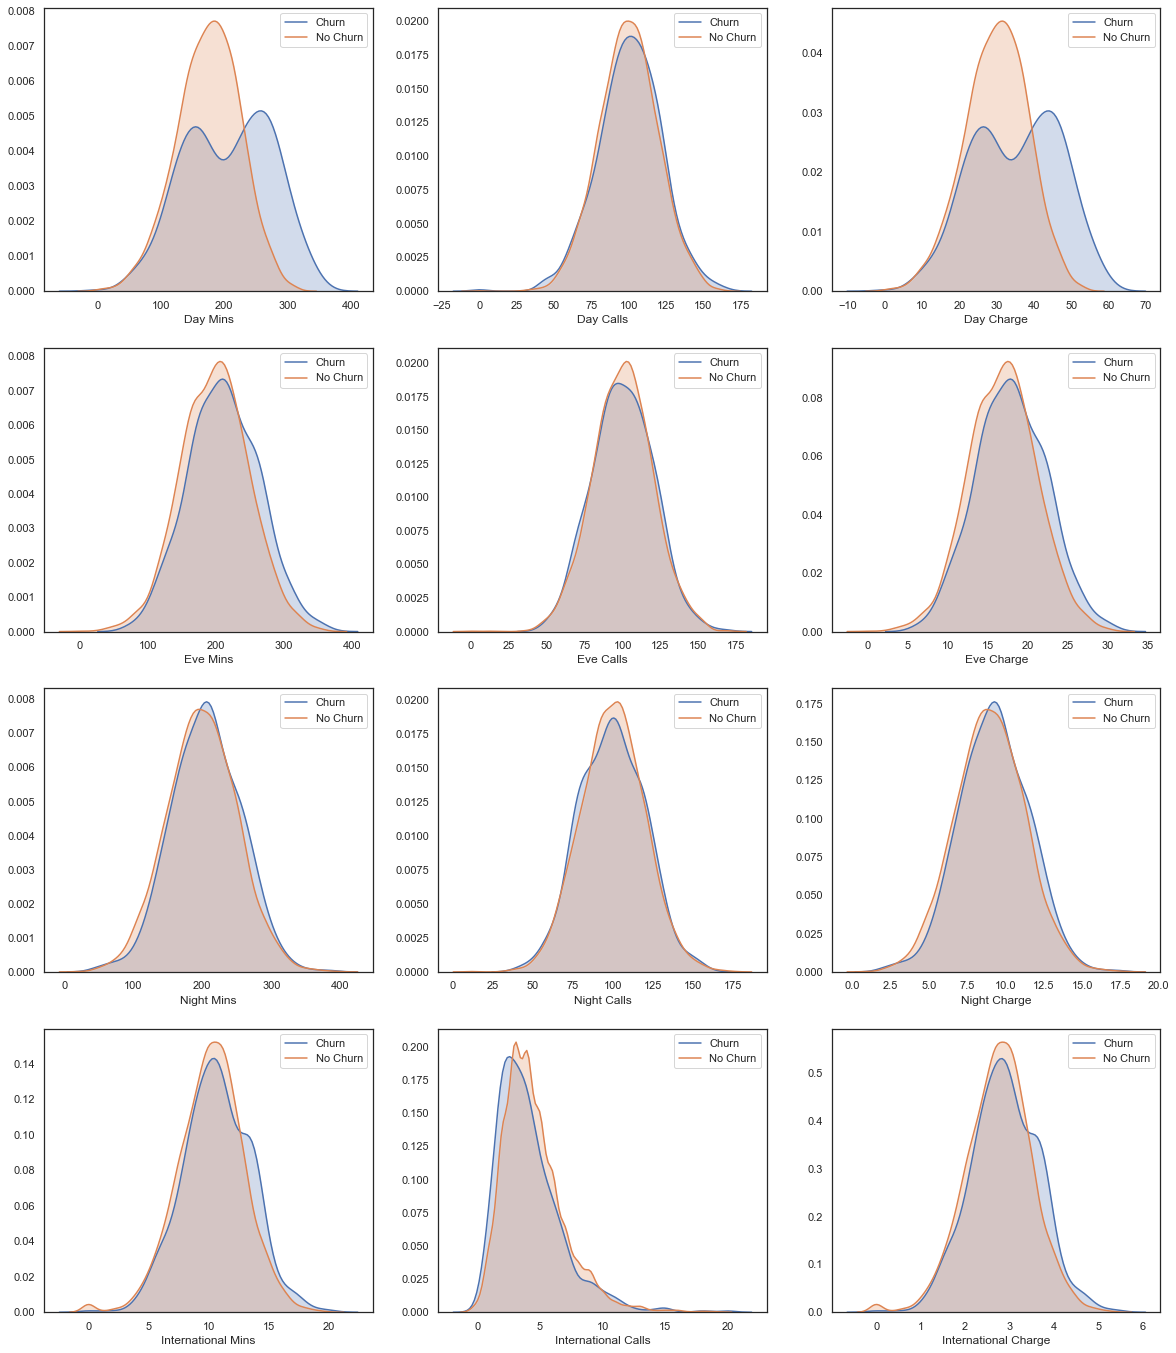

In [95]:
churnDf = df[df.Churn == 'Yes']
noChurnDf = df[df.Churn == 'No']

f, axes = plt.subplots(4, 3, figsize=(20, 24))

#sns.distplot(df['Day Mins'],   ax=axes[0,0]);
sns.kdeplot(data=churnDf['Day Mins'],    shade=True, label='Churn',  ax=axes[0,0])
sns.kdeplot(data=noChurnDf['Day Mins'], shade=True, label='No Churn',ax=axes[0,0])
axes[0,0].legend()
axes[0,0].set_xlabel('Day Mins')

#sns.distplot(df['Day Calls'],  ax=axes[0,1]);
sns.kdeplot(data=churnDf['Day Calls'],    shade=True, label='Churn',  ax=axes[0,1])
sns.kdeplot(data=noChurnDf['Day Calls'], shade=True, label='No Churn',ax=axes[0,1])
axes[0,1].legend()
axes[0,1].set_xlabel('Day Calls')


#sns.distplot(df['Day Charge'], ax=axes[0,2]);
sns.kdeplot(data=churnDf['Day Charge'],    shade=True, label='Churn',  ax=axes[0,2])
sns.kdeplot(data=noChurnDf['Day Charge'], shade=True, label='No Churn',ax=axes[0,2])
axes[0,2].legend()
axes[0,2].set_xlabel('Day Charge')

#sns.distplot(df['Eve Mins'],   ax=axes[1,0]);
sns.kdeplot(data=churnDf['Eve Mins'],    shade=True, label='Churn',  ax=axes[1,0])
sns.kdeplot(data=noChurnDf['Eve Mins'], shade=True, label='No Churn',ax=axes[1,0])
axes[1,0].legend()
axes[1,0].set_xlabel('Eve Mins')

#sns.distplot(df['Eve Calls'],  ax=axes[1,1]);
sns.kdeplot(data=churnDf['Eve Calls'],   shade=True, label='Churn',   ax=axes[1,1])
sns.kdeplot(data=noChurnDf['Eve Calls'], shade=True, label='No Churn',ax=axes[1,1])
axes[1,1].legend()
axes[1,1].set_xlabel('Eve Calls')

#sns.distplot(df['Eve Charge'], ax=axes[1,2]);
sns.kdeplot(data=churnDf['Eve Charge'],    shade=True, label='Churn',  ax=axes[1,2])
sns.kdeplot(data=noChurnDf['Eve Charge'], shade=True, label='No Churn',ax=axes[1,2])
axes[1,2].legend()
axes[1,2].set_xlabel('Eve Charge')


#sns.distplot(df['Night Mins'],   ax=axes[2,0]);
sns.kdeplot(data=churnDf['Night Mins'],    shade=True, label='Churn',  ax=axes[2,0])
sns.kdeplot(data=noChurnDf['Night Mins'], shade=True, label='No Churn',ax=axes[2,0])
axes[2,0].legend()
axes[2,0].set_xlabel('Night Mins')

#sns.distplot(df['Night Calls'],  ax=axes[2,1]);
sns.kdeplot(data=churnDf['Night Calls'],    shade=True, label='Churn',  ax=axes[2,1])
sns.kdeplot(data=noChurnDf['Night Calls'], shade=True, label='No Churn',ax=axes[2,1])
axes[2,1].legend()
axes[2,1].set_xlabel('Night Calls')

#sns.distplot(df['Night Charge'], ax=axes[2,2]);
sns.kdeplot(data=churnDf['Night Charge'],    shade=True, label='Churn',  ax=axes[2,2])
sns.kdeplot(data=noChurnDf['Night Charge'], shade=True, label='No Churn',ax=axes[2,2])
axes[2,2].legend()
axes[2,2].set_xlabel('Night Charge')


#sns.distplot(df['International Mins'],   ax=axes[3,0]);
sns.kdeplot(data=churnDf['International Mins'],    shade=True, label='Churn',  ax=axes[3,0])
sns.kdeplot(data=noChurnDf['International Mins'], shade=True, label='No Churn',ax=axes[3,0])
axes[3,0].legend()
axes[3,0].set_xlabel('International Mins')

#sns.distplot(df['International Calls'],  ax=axes[3,1]);
sns.kdeplot(data=churnDf['International Calls'],   shade=True, label='Churn',   ax=axes[3,1])
sns.kdeplot(data=noChurnDf['International Calls'], shade=True, label='No Churn',ax=axes[3,1])
axes[3,1].legend()
axes[3,1].set_xlabel('International Calls')

#sns.distplot(df['International Charge'], ax=axes[3,2]);
sns.kdeplot(data=churnDf['International Charge'],    shade=True, label='Churn',  ax=axes[3,2])
sns.kdeplot(data=noChurnDf['International Charge'], shade=True, label='No Churn',ax=axes[3,2])
axes[3,2].legend();
axes[3,2].set_xlabel('International Charge');


**Insight 12:**  
Only 'Day Calls' and its charges has any significant influence on Churn,   
Evening Calls(and its charges), Night Calls(and its charges) doesn't seem to have significant impact on Churn.